In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define grid world environment
# 'S' denotes the starting point, 'G' denotes the goal, '#' denotes obstacles, '.' denotes empty spaces
# Example grid:
# [['S', '.', '.', '#'],
#  ['.', '#', '.', '#'],
#  ['.', '.', '.', '.'],
#  ['#', '.', '#', 'G']]
grid = np.array([
    ['S', '.', '.', '#'],
    ['.', '#', '.', '#'],
    ['.', '.', '.', '.'],
    ['#', '.', '#', 'G']
])

# Define rewards and penalties
REWARD_GOAL = 100
PENALTY_OBSTACLE = -10
PENALTY_STEP = -1

# Initialize parameters
num_episodes = 1000
epsilon = 0.1  # exploration-exploitation trade-off
alpha = 0.1  # learning rate
gamma = 0.9  # discount factor

# Function to convert grid coordinates to state index
def state_to_index(state):
    return np.ravel_multi_index(state, grid.shape)

# Function to convert state index to grid coordinates
def index_to_state(index):
    return np.unravel_index(index, grid.shape)

# Initialize Q-table with small random values
num_states = np.prod(grid.shape)
num_actions = 4  # up, down, left, right
Q = np.random.uniform(low=-1, high=1, size=(num_states, num_actions))

# Define action mapping: 0 - up, 1 - down, 2 - left, 3 - right
actions = {0: (-1, 0),  # up
           1: (1, 0),   # down
           2: (0, -1),  # left
           3: (0, 1)}   # right

# Function to choose action based on epsilon-greedy policy
def choose_action(state):
    if np.random.rand() < epsilon:
        return np.random.choice(num_actions)
    else:
        return np.argmax(Q[state, :])

# Function to update Q-table based on experience
def update_Q_table(state, action, next_state, reward):
    Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[next_state, :]) - Q[state, action])

# Q-Learning algorithm
episode_rewards = []

for episode in range(num_episodes):
    state = np.where(grid == 'S')
    state = state_to_index(state)
    total_reward = 0
    done = False
    
    while not done:
        action = choose_action(state)
        next_state_coords = (index_to_state(state)[0] + actions[action][0],
                             index_to_state(state)[1] + actions[action][1])
        
        # Check if next state is within bounds
        if (0 <= next_state_coords[0] < grid.shape[0]) and (0 <= next_state_coords[1] < grid.shape[1]):
            next_state = state_to_index(next_state_coords)
        else:
            next_state = state  # stay in current state if next move is out of bounds
        
        # Determine reward
#         if grid[next_state_coords] == '#':  # hit an obstacle
#             reward = PENALTY_OBSTACLE
#         elif grid[next_state_coords] == 'G':  # reached the goal
#             reward = REWARD_GOAL
#             done = True
#         else:  # empty space
#             reward = PENALTY_STEP
        
        # Update Q-table
        update_Q_table(state, action, next_state, reward)
        
        # Move to next state
        state = next_state
        total_reward += reward
    
    episode_rewards.append(total_reward)

# Evaluate agent's performance
avg_reward_per_episode = np.mean(episode_rewards)
print(f"Average reward per episode: {avg_reward_per_episode}")

# Visualize the Q-table changes over episodes (optional)
# Plot the Q-table values (max Q-value for each state)
max_Q_values = np.max(Q, axis=1).reshape(grid.shape)
plt.figure(figsize=(8, 6))
plt.imshow(max_Q_values, cmap='cool', interpolation='nearest')
plt.colorbar()
plt.title('Q-table Values')
plt.xlabel('Column')
plt.ylabel('Row')
plt.xticks(range(grid.shape[1]), range(grid.shape[1]))
plt.yticks(range(grid.shape[0]), range(grid.shape[0]))
plt.gca().invert_yaxis()
plt.show()


ValueError: x and y must have same first dimension, but have shapes (1000,) and (0,)

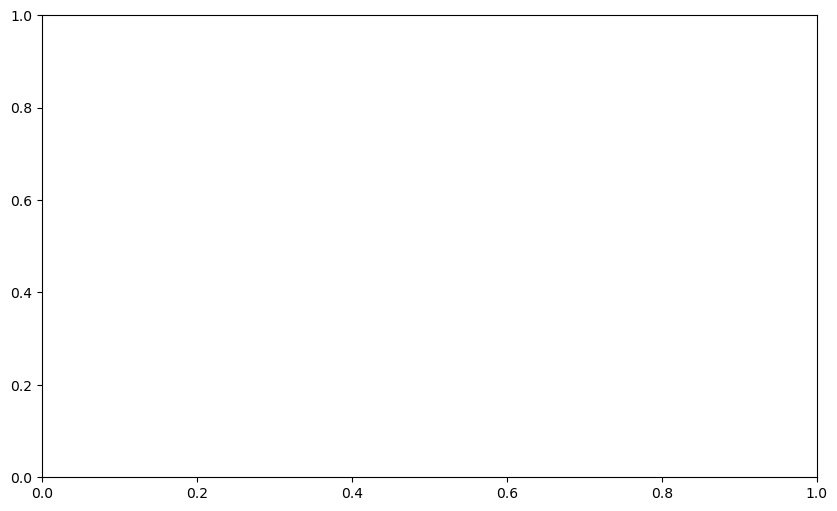

In [2]:
# Plotting the average reward per episode
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_episodes + 1), episode_rewards, color='b', linewidth=2)
plt.title('Average Reward per Episode')
plt.xlabel('Episode')
plt.ylabel('Average Reward')
plt.grid(True)
plt.show()
